## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [33]:
# Use this cell to begin your analysis, and add as many as you would like!
#import pandas and numpy
import pandas as pd
import numpy as np

In [34]:
#import datasets
df = pd.read_csv('datasets/office_episodes.csv')
print(df.info())
display(df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB
None


,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125


In [35]:
display(df[df['ratings'] < 9.0])

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,180,9,Moving On,"Andy finds out that Erin dumped him for Pete, ...",8.1,2089,4.06,42,2013-02-14,NaN,Jon Favreau,Graham Wagner,False,0.46875
181,181,9,The Farm,Show follows Dwight Schrute a beet farmer runn...,7.5,2189,3.54,22,2013-03-14,NaN,Paul Lieberstein,Paul Lieberstein,False,0.28125
182,182,9,Promos,The release of the documentary promos creates ...,8.0,1924,3.44,22,2013-04-04,Ryan Howard,Jennifer Celotta,Tim McAuliffe,True,0.43750
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,False,0.43750


In [36]:
#Assign a color label
color = []
for rating in df.scaled_ratings:
    if rating < 0.25:
        color.append('red')
    elif (rating >= 0.25) and (rating < 0.5):
        color.append('orange')
    elif (rating >= 0.5) and (rating < 0.75):
        color.append('lightgreen')
    elif rating >= 0.75:
        color.append('darkgreen')

In [37]:
#Assign marker size
size = []
for guest in df.has_guests:
    if guest == True:
        size.append(250)
    else:
        size.append(25)

In [38]:
#Import matplotlib
import matplotlib.pyplot as plt

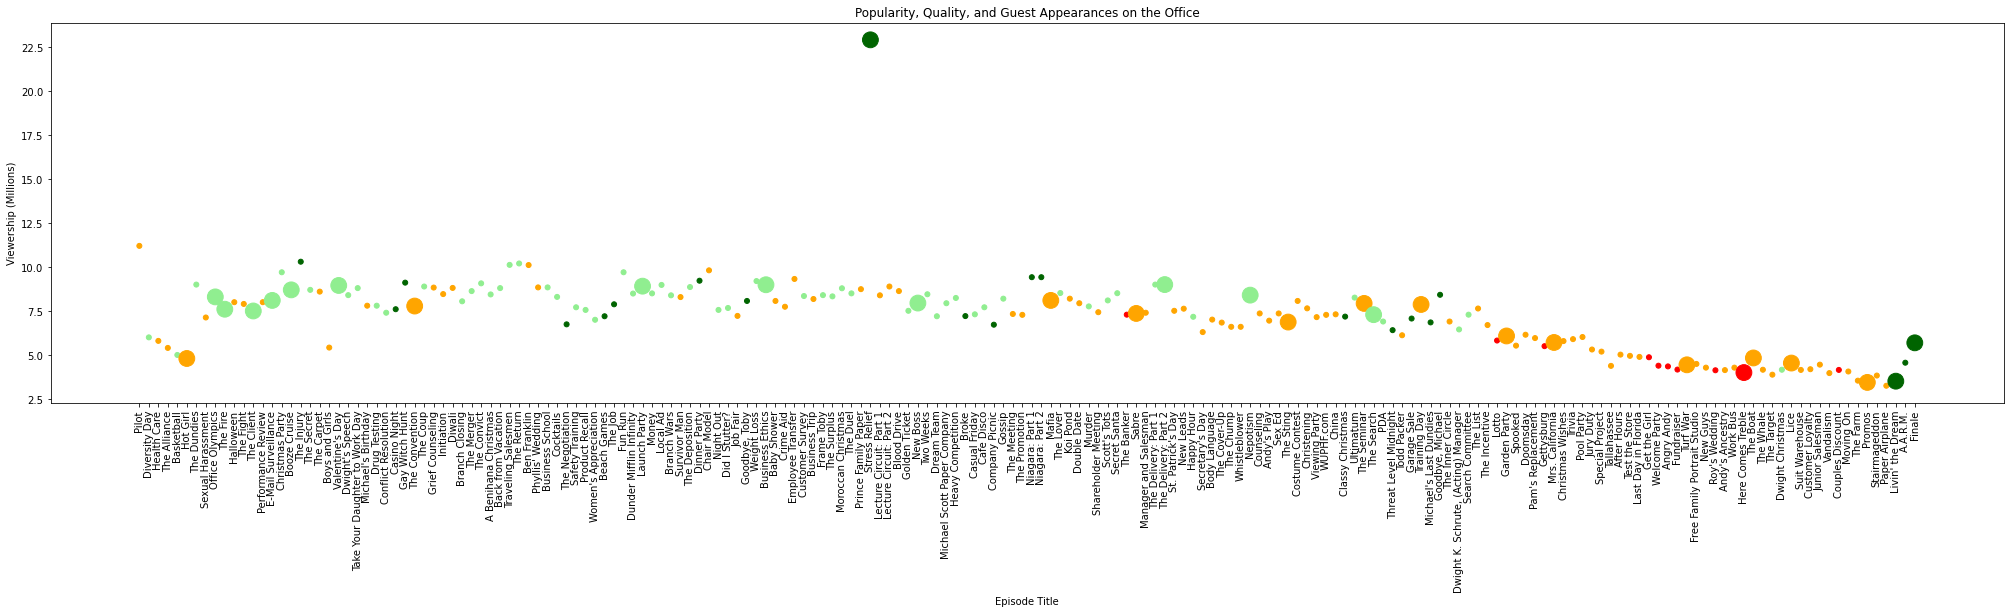

In [39]:
#Set up the graph
fig = plt.figure()
plt.rcParams['figure.figsize'] = [35, 7]
plt.scatter(x=df.episode_title,y=df.viewership_mil,c=color,s=size)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel('Episode Title')
plt.ylabel('Viewership (Millions)')
plt.xticks(rotation = 90)

plt.show()

In [40]:
#find Top Star
has_guests = df[df.has_guests]

most_watched = has_guests.viewership_mil.max()
print(most_watched)

22.91


In [41]:
top_stars = has_guests[has_guests.viewership_mil == most_watched]['guest_stars']
print(top_stars)

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object


In [42]:
top_star = top_stars.iloc[0].split(', ')[0]
print(top_star)

Cloris Leachman
